In [1]:
import construction as cs
import matplotlib.pyplot as plt

### read font
from matplotlib import font_manager

font_dirs = ['Barlow/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

# set font
plt.rcParams['font.family'] = 'Barlow'

import networkx as nx
%matplotlib inline
%config InlineBackend.figure_format = 'retina'



%load_ext autoreload
%autoreload 2

# Load generated graphs

In [2]:
def load_origin_graph(file_name,gap=299):
    data_in = cs.load_data("../Datasets/"+file_name+".dat")
    gap = 299 
    graphs_in = cs.build_graphs(data_in,gap=gap)
    return graphs_in

def load_ETNgen_graph(file_name):
    data_in = cs.load_data("../Generated_graphs/ETNgen-"+file_name+".dat")
    gap = 299 
    graphs_in = cs.build_graphs(data_in,gap=gap)
    return graphs_in

def load_dym_graph(file_name):
    data_in = cs.load_data("../Competitors_generated_graphs/Dymond/"+file_name+"_dym.dat")
    gap = 0 
    graphs_in = cs.build_graphs(data_in,gap=gap)
    return graphs_in

def load_tag_graph(file_name):
    data_in = cs.load_data("../Competitors_generated_graphs/TagGen/"+file_name+"_generato_TagGen.dat")
    gap = 0 
    graphs_in = cs.build_graphs(data_in,gap=gap)
    return graphs_in

def load_stm_graph(file_name):
    data_in = cs.load_data("../Competitors_generated_graphs/STM/"+file_name+"_STM.dat")
    gap = 0 
    graphs_in = cs.build_graphs(data_in,gap=gap)
    return graphs_in

In [3]:
import networkx as nx
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

from topological_metrics import *

# Compute and store topological results

In [7]:
ORIGINAL_COLOR = "#4C4C4C"
ETN_COLOR = "#5100FF"
STM_COLOR = "#FF6A74"
TAG_COLOR = "#63CA82"
DYM_COLOR = "#FFD579"

In [114]:
file_name = "InVS13"
orig_graphs = load_origin_graph(file_name,gap=299)
etn_gen = load_ETNgen_graph(file_name)
dym_gen = load_dym_graph(file_name)
tag_gen = load_tag_graph(file_name)
stm_gen = load_stm_graph(file_name)

In [115]:
min_len = min(len(orig_graphs),len(etn_gen),len(dym_gen),len(stm_gen),len(tag_gen))

orig_graphs = orig_graphs[:min_len]
etn_gen = etn_gen[:min_len]
dym_gen = dym_gen[:min_len]
stm_gen = stm_gen[:min_len]
tag_gen = tag_gen[:min_len]

In [116]:
print("ETNgen")
res_etn = compute_all_metrics(orig_graphs,etn_gen)
print("Dym")
res_dym = compute_all_metrics(orig_graphs,dym_gen)
print("STM")
res_stm = compute_all_metrics(orig_graphs,stm_gen)
print("TAG")
res_tag = compute_all_metrics(orig_graphs,tag_gen)

ETNgen
density 	 0.051 0.000374
global clu	 0.030 0.107848
avg short p	 0.020 0.541883
metric p 	 0.052 0.000305
metric n 	 0.121 0.000002
assortat 	 0.252 0.000000
s metric	 0.041 0.007218
metric f 	 0.051 0.000374
strenght 	 0.220 0.000000
duration 	 0.100 0.000085
Dym
density 	 0.602 0.000000
global clu	 0.138 0.000000
avg short p	 0.588 0.000000
metric p 	 0.605 0.000000
metric n 	 0.602 0.000000
assortat 	 0.279 0.000000
s metric	 0.600 0.000000
metric f 	 0.602 0.000000
strenght 	 0.356 0.000000
duration 	 0.341 0.000000
STM
density 	 0.678 0.000000
global clu	 0.010 0.997710
avg short p	 0.678 0.000000
metric p 	 0.678 0.000000
metric n 	 0.271 0.000000
assortat 	 0.436 0.000000
s metric	 0.678 0.000000
metric f 	 0.678 0.000000
strenght 	 0.308 0.000000
duration 	 0.347 0.000000
TAG
density 	 0.295 0.000000
global clu	 0.236 0.000000
avg short p	 0.308 0.000000
metric p 	 0.271 0.000000
metric n 	 0.930 0.000000
assortat 	 0.719 0.000000
s metric	 0.307 0.000000
metric f 	 0.29

In [119]:
np.save("topology_results/etngen/topology_res_"+file_name+".npy",res_etn)
np.save("topology_results/dymgen/topology_res_"+file_name+".npy",res_dym)
np.save("topology_results/stmgen/topology_res_"+file_name+".npy",res_stm)
np.save("topology_results/taggen/topology_res_"+file_name+".npy",res_tag)

# load topology results

In [5]:
def load_topo_res(file_name):
    res_etn = np.load("topology_results/etngen/topology_res_"+file_name+".npy")[:,0]
    res_dym = np.load("topology_results/dymgen/topology_res_"+file_name+".npy")[:,0]
    res_stm = np.load("topology_results/stmgen/topology_res_"+file_name+".npy")[:,0]
    res_tag = np.load("topology_results/taggen/topology_res_"+file_name+".npy")[:,0]
    
    return res_etn,res_stm,res_tag,res_dym

In [8]:
ORIGINAL_COLOR = "#4C4C4C"
ETN_COLOR = "#5100FF"
STM_COLOR = "#FF6A74"
TAG_COLOR = "#63CA82"
DYM_COLOR = "#FFD579"

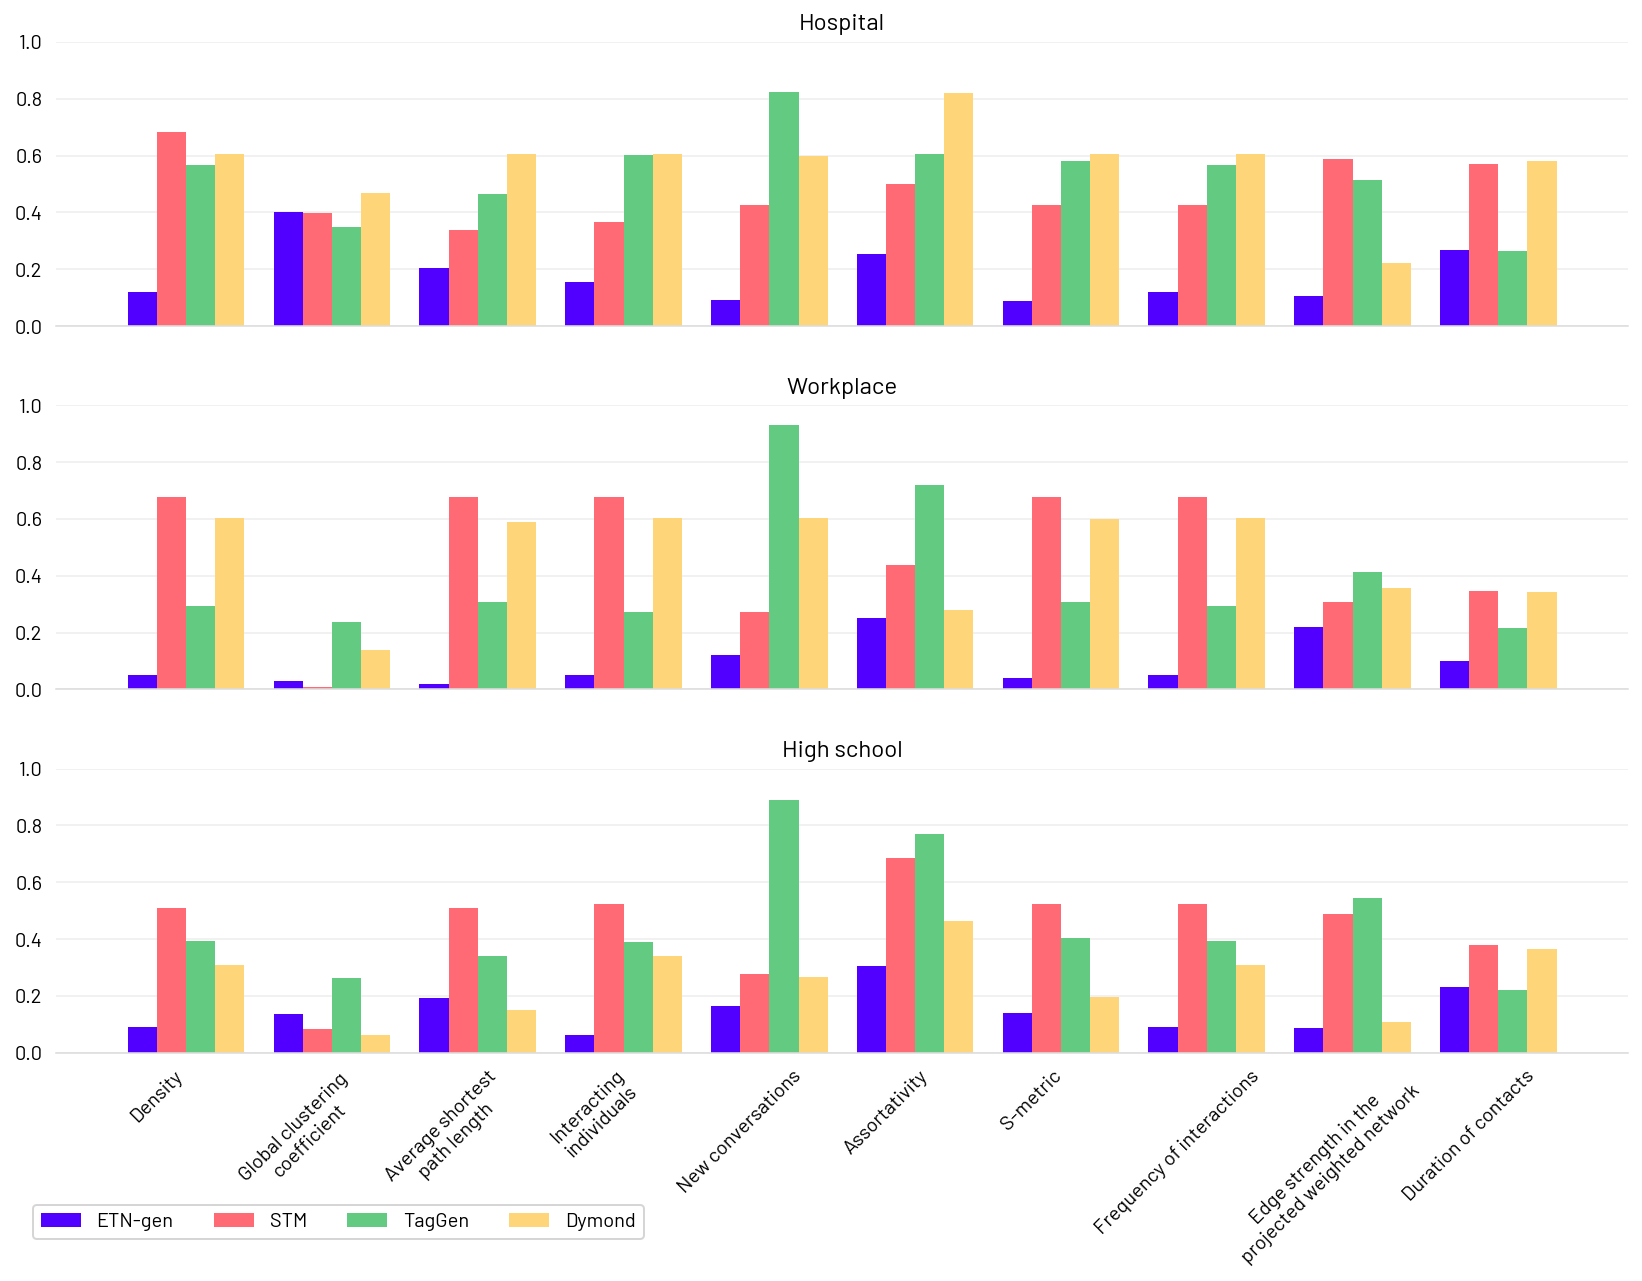

In [10]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


x1,x2,x3,x4 = load_topo_res("LH10")
labels = ["Density",
          "Global clustering \ncoefficient",
          "Average shortest\npath length",
          "Interacting\nindividuals",
          "New conversations",
          "Assortativity",
          "S-metric",          
          "Frequency of interactions",
          "Edge strength in the\nprojected weighted network",
          "Duration of contacts"]#,"sim1"]#,"sim2"]
x = np.arange(len(x1))  # the label locations
width = 0.2  # the width of the bars


fig, ax = plt.subplots(3,1,figsize=(12,9))


ax[0].title.set_text("Hospital")
rects1 = ax[0].bar(x - width/2, x1, width, label='ETN-gen',color=ETN_COLOR)
rects2 = ax[0].bar(x + width/2, x2, width, label='STM',color=STM_COLOR)
rects3 = ax[0].bar(x + 0.3, x3, width, label='TagGen',color=TAG_COLOR)
rects4 = ax[0].bar(x + 0.3+0.2, x4, width, label='Dymond',color=DYM_COLOR)



x1,x2,x3,x4 = load_topo_res("InVS13")
ax[1].title.set_text("Workplace")
rects1 = ax[1].bar(x - width/2, x1, width, label='ETN-gen',color=ETN_COLOR)
rects2 = ax[1].bar(x + width/2, x2, width, label='STM',color=STM_COLOR)
rects3 = ax[1].bar(x + 0.3, x3, width, label='TagGen',color=TAG_COLOR)
rects4 = ax[1].bar(x + 0.3+0.2, x4, width, label='Dymond',color=DYM_COLOR)


x1,x2,x3,x4 = load_topo_res("High_School11")
ax[2].title.set_text("High school")
rects1 = ax[2].bar(x - width/2, x1, width, label='ETN-gen',color=ETN_COLOR)
rects2 = ax[2].bar(x + width/2, x2, width, label='STM',color=STM_COLOR)
rects3 = ax[2].bar(x + 0.3, x3, width, label='TagGen',color=TAG_COLOR)
rects4 = ax[2].bar(x + 0.3+0.2, x4, width, label='Dymond',color=DYM_COLOR)

ax[0].set_xticks(x)
ax[0].set_xticklabels([" "," "," "," "," "," "," "," "," "," "],rotation=45)
ax[0].set_ylim(0,1)
ax[1].set_xticks(x)
ax[1].set_xticklabels([" "," "," "," "," "," "," "," "," "," "],rotation=45)
ax[1].set_ylim(0,1)
ax[2].set_xticks(x)
ax[2].set_xticklabels(labels,rotation=45)
ax[2].set_ylim(0,1)
#ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax[0].tick_params(bottom=False, right=False,left=False)
ax[0].set_axisbelow(True)
ax[0].yaxis.grid(True, color='#EEEEEE')
ax[0].xaxis.grid(False)

ax[1].tick_params(bottom=False, right=False,left=False)
ax[1].set_axisbelow(True)
ax[1].yaxis.grid(True, color='#EEEEEE')
ax[1].xaxis.grid(False)

ax[2].tick_params(bottom=False, right=False,left=False)
ax[2].set_axisbelow(True)
ax[2].yaxis.grid(True, color='#EEEEEE')
ax[2].xaxis.grid(False)


ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].spines['bottom'].set_color('#DDDDDD')



ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].spines['bottom'].set_color('#DDDDDD')



ax[2].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False)
ax[2].spines['left'].set_visible(False)
ax[2].spines['bottom'].set_color('#DDDDDD')

ax[2].legend(loc='upper right',ncol = 5,bbox_to_anchor=(0.38, -0.5))

fig.tight_layout()
plt.savefig("topology_main.pdf", bbox_inches = 'tight')
plt.show()

In [ ]:
figure, axes = plt.subplots(nrows=3, ncols=1,figsize=(10,9))
figure.tight_layout(pad=3.0)

axes[0].plot(moving_average(nb_interactions(orig_graphs)),color=ORIGINAL_COLOR)
axes[0].plot(moving_average(nb_interactions(etn_gen)),color=ETN_COLOR)
axes[0].plot(moving_average(nb_interactions(stm_gen)),color=STM_COLOR)
axes[0].plot(moving_average(nb_interactions(dym_gen)),color=DYM_COLOR)

axes[0].set_xlabel("Timestamps")
axes[0].set_ylabel("Number of interactions")
axes[0].set_title("Hospital")

axes[0].tick_params(bottom=False, right=False,left=False)
axes[0].set_axisbelow(True)
axes[0].yaxis.grid(True, color='#EEEEEE')
axes[0].xaxis.grid(False)

axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[0].spines['left'].set_visible(False)
axes[0].spines['bottom'].set_color('#DDDDDD')

axes[0].axis(ymin=0,ymax=75)



a = plt.axes([.6, .9, .4, .1])

plt.tick_params(bottom=False, right=False,left=False)
plt.plot(moving_average(nb_interactions(orig_graphs)))
plt.plot(moving_average(nb_interactions(orig_graphs)),color=ORIGINAL_COLOR)
plt.plot(moving_average(nb_interactions(etn_gen)),color=ETN_COLOR)
plt.plot(moving_average(nb_interactions(stm_gen)),color=STM_COLOR)
plt.plot(moving_average(nb_interactions(dym_gen)),color=DYM_COLOR)
plt.plot(moving_average(nb_interactions(tag_gen)),color=TAG_COLOR)
plt.xticks([])
plt.tick_params(bottom=False, right=False,left=False)


### decide local and global splitting

![title](img/Local_global_split.svg)

here you can set local and global split, so you can decide how many dictionary do you want in a global split

In [ ]:
local_split = 3600*1 # 1 hours
global_slpit = 3600*24 # 1 day

In [ ]:
nb_inter = get_number_of_interactions(graphs)
smooth_nb_int = moving_average(nb_inter,10)
plt.figure(figsize=(18,3))
plt.plot(np.arange(0,len(smooth_nb_int)/(3600/gap),gap/3600), smooth_nb_int,color="blue")
plt.xlabel("hours")
plt.ylabel("nb of interactions")

plt.vlines(global_slpit/3600,0,np.max(smooth_nb_int)*1.1,color="red")
plt.vlines(global_slpit*2/3600,0,np.max(smooth_nb_int)*1.1,color="red")
plt.vlines(global_slpit*3/3600,0,np.max(smooth_nb_int)*1.1,color="red")
for i in range(10):
    plt.vlines(local_split*(i)/3600,0,30,color="green")


custom_lines = [Line2D([0], [0], color="blue", lw=4),
                Line2D([0], [0], color="red", lw=4),
                Line2D([0], [0], color="green", lw=4)]
plt.legend(custom_lines, ['nb of interactions', 'global split', 'local split'],loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

### split graphs into list of graphs (depending on local splitting)

In [ ]:
local_split = int(local_split/(gap+1))
global_slpit = int(global_slpit/(gap+1))

In [ ]:
daily_graphs = []

for i in range(int(global_slpit/local_split)):
    daily_graphs.append([])
    
    
hour = 0
c = 1
for i in range(len(graphs)):
    g = graphs[i]
    if i < local_split*c:
        daily_graphs[hour].append(g)
    else:
        c = c + 1
        if hour == len(daily_graphs)-1:
            hour = 0
        else:
            hour = hour + 1
        daily_graphs[hour].append(g)

### count ETNS and store it in dictionaries (one for each local split)

In [ ]:
k=2
ETNSs = []
dizs = []

for i in range(int(global_slpit/local_split)):
    ETNS = count_ETN(daily_graphs[i],k)
    ETNS = {k: v for k, v in sorted(ETNS.items(),reverse=True, key=lambda item: item[1])}
    
    ETNSs.append(ETNS)

    diz = get_dict(ETNS,k)
    dizs.append(diz)

### starting from a seed graph generate seed graphs up to k!

In [ ]:
g0 = graphs[0]
graph_seed = generate_seed_graphs(g0,graphs,k,alpha = 0.5)

In [ ]:
# decide how many graphs you want to generate
nb_graphs = len(graphs)

In [ ]:
c =  1
hour = 0 
nodes = list(graph_seed[0].nodes())
tg = graph_seed
verbose = True

for i in range(nb_graphs-1):
    if i < local_split*c:
        pos = hour
    else:
        c = c + 1
        if hour == len(daily_graphs)-1:
            hour = 0
        else:
            hour = hour + 1
        pos = hour
        
    diz = dizs[pos]
        
    graphs_in = tg[i:i+k]
    g_new = generate_graph_g2(nodes,graphs_in,diz,k,alpha = 0.5)
    tg.append(g_new)
    
    
    if verbose:
        if i % 100 == 0:
            print(i,"over",nb_graphs)

# save graphs as temporal edge list

In [ ]:
new_temporal_graph_name = "ETNgen-"+file_name
print(new_temporal_graph_name)

In [ ]:
edge_list = []
c = 0 
gap = 300
nodes = set()
for i in tg:
    edges = list(i.edges())

    for a,b in edges:
        edge_list.append([c*gap,a,b])
        nodes.add(a)
        nodes.add(b)
    c = c + 1
    
orig_nod = set(tg[0].nodes())
diff = orig_nod.difference(nodes)
for i in diff:
    edge_list.append([c*gap,i,i])

In [ ]:
df_edge_list = pd.DataFrame(edge_list,columns=["time","node_A","node_B"])
df_edge_list.to_csv("Generated_graphs/"+new_temporal_graph_name+".dat",sep=" ",index=False,header=False)

# plot

In [ ]:
w = 10
nb_inter = get_number_of_interactions(graphs)
smooth_nb_int = moving_average(nb_inter,w)


plt.figure(figsize=(18,3))
plt.plot(smooth_nb_int,color="blue",label="Original")
plt.plot(moving_average(get_number_of_interactions(tg),w),color="red",label="ETNgen")
plt.xlabel("time")
plt.ylabel("nb of interactions")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()